# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

## Exercise 09.1 - Soluzione Proposta

Gli algoritimi genetici sono una classe di algoritmi volta a determinare la soluzione ottimale di un problema tramite un' analogia con la selezione naturale. 

Vengono prodotte delle soluzioni del problema, dette "cromosomi", le quali compongono una "popolazione". Ad ogni cromosoma e' associato un parametro che quantifica la bonta' della soluzione al problema. I vari abitanti della popolazione vengono fatti riprodurre tra loro, e per garantire la convergenza verso la soluzione del problema, i cromosomi che possono riprodursi sono scelti prediligendo i soggetti migliori.

Per evitare di rimanere incastrati in un minimo locale e garantire una corretta esplorazione dello spazio delle soluzioni, sono adottate 2 tecniche:

La prima consiste nel dare possibilita' anche ai cromosomi peggiori di riprodursi, la seconda consiste, invece, nell'applicare ai soggetti di una generazione delle mutazioni individuali.

### Algoritmo Proposto

Nell'algoritmo proposto per la soluzione del problema del commesso viaggiatore con N citta' ogni oggetto **cromosoma** e' individauto da un vettore di interi da 0 a N-1, dove gli interi indicano l'indice delle citta' contenute nello oggetto **Mappa**, ogni cromosoma ha tra i suoi parametri la distanza totale percorsa, utilizzata come funzione costo.

E' presente una classe **Population** la quale e' composta da un vettore di M cromosomi, ordinati per distanza totale crescente tramite una lambda function, e dai vari metodi di manipolazione: 

   - **Selection()**: seleziona un individuo per la riproduzione tramite la legge $j= int(M \times r^p)+1$ dove $r$ e' estratto uniformemnte $r\in[0,1)$ e $p=4$.
   
   - **Crossover()**: algoritmo in cui presi due genitori sono prodotti due figli tramite il metodo del taglio testa-coda richiesto dall'esercizio. I due figli sono aggiunti alla popolazione
   
   - **Mutation()**: contiene i quattro algoritmi di mutazioni richiesti,nei quali l;a citta' ) e' sempre lasciata in prima posizione. Ogni mutazione puo' avvenire con probabilita' **pmutation**, quindi si possono avere anche mutazioni multiple
   
   - **Move()**: ogni singola mossa consiste, in una prima possibile mutazione della seconda meta' peggiore di individui, successivamente viene selezionata una coppia individui che potranno fare Crossover con probabilita' **pcrossover**, altrimenti si produranno dei figli uguali ai genitori che potranno pero' subire mutazione, sempre con probabilita' **pmutation**. Questo processo e' ripetuto per un numero di volte pari al numero $N$ di citta' e al termine viene effettuato un riordinamento e un riscalamento al numero iniziali di cromosomi.
   
Ogni cromosoma e' inoltre dotato di un metodo **CheckPath** che controlla che la citta' 0 rimanga sempre la citta di partenza.

Sono stati studiati due casi:

  1. Citta' su una circoferenza unitaria. 
  2. Citta' su una superficie quadrata unitaria.
 
 Per entrambi i casi si e' provato a cercare la soluzione del problema lavorando solo con le mutazioni.



## Citta' sulla circoferenza - Solo Mutazioni

E' di seguito riportato il percorso migliore trovato e l'andamento della $|L|$
 del percorso migliore e della $\langle |L|
 \rangle$ in funzione del numero di generazioni.

Come si puo' notare, la soluzione esatta, ovvero le citta' percorse lungo la circoferenza, e' stata trovata anche solo con le mutazioni genetiche.

Dal grafico delle distanze invece, possiamo notare come la singola soluzione migliore sia trovata molto velocemente, ma come la popolazione non vada a convergere globalmente: e' dovuto al fatto che le mutazioni permettono solo di esplorare lo spazio delle soluzioni, la convergenza e' prodotta dal **Crossover**.  

Si noti inoltre, come entrambe ke funzioni costo siano decrescenti, questo e' dovuto alla scelta di rendere l'algoritmo elitario: i cromosomi sono ordinati e selezionati in base alla loro funzione costo

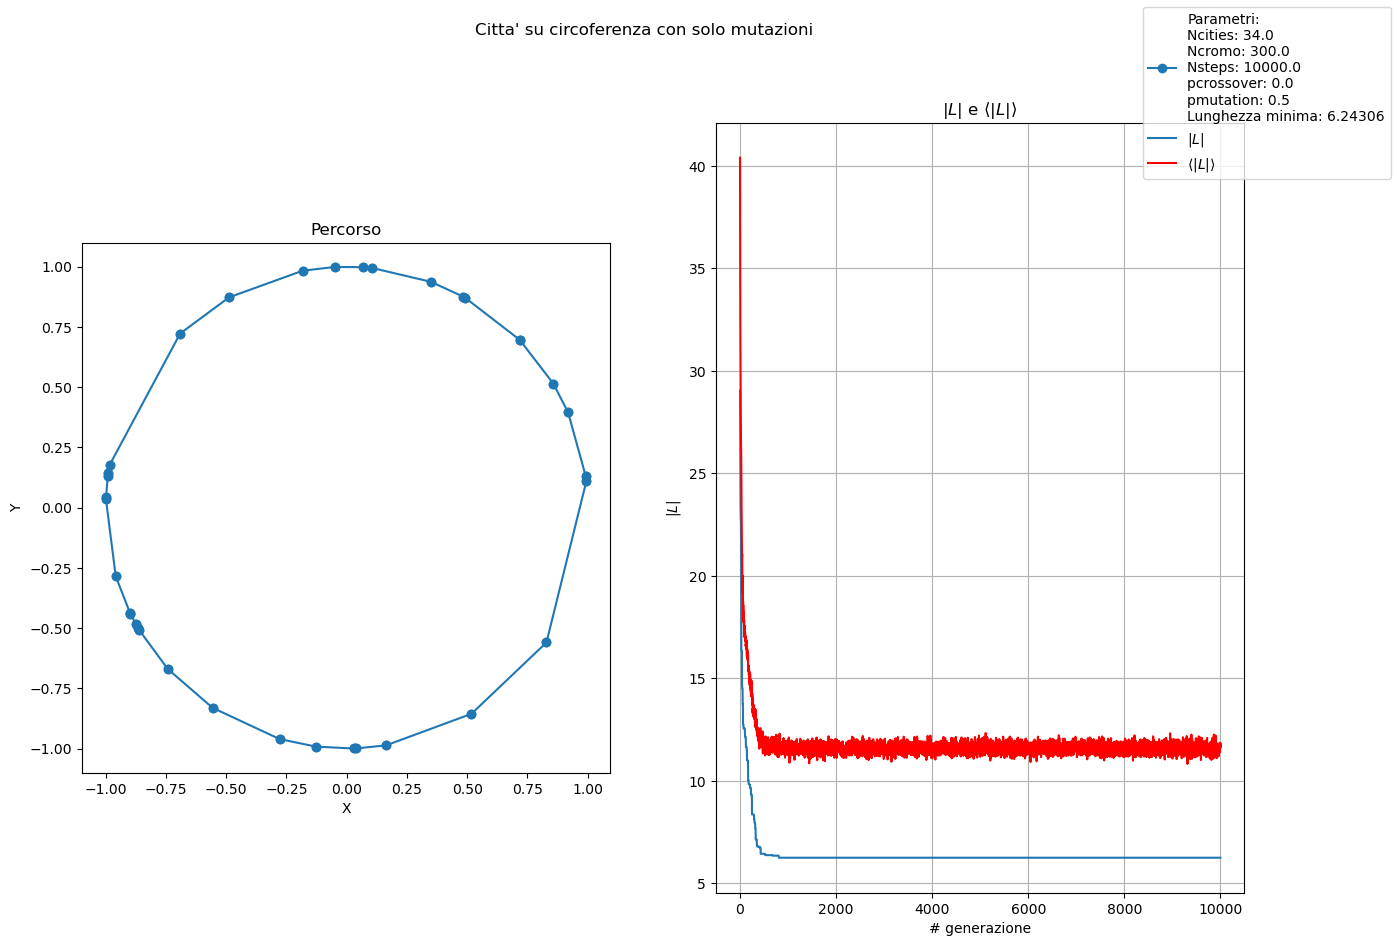

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Coordinate della mappa circolare
circlemap = np.loadtxt("./map_circle.data")
x_circle = circlemap[:, 0]
y_circle = circlemap[:, 1]

# Dati di input
input_data = np.loadtxt("./input_onlymutation_circle.data")
Ncities, Ncromo, Nsteps, pcrossover, pmutation = input_data

# Dati degli indici migliori
best = np.loadtxt("./best_onlymutation_circle.data")
indices = [int(index) for index in best]

#Dati lunghezze
lengths = np.loadtxt("./bestlength_circle_onlymutation.data")
bestlength = lengths[:,0]

averages = np.mean(lengths, axis=1)

# Creazione di coppie di punti collegati in base all'ordine degli indici
connected_points = [(x_circle[i], y_circle[i]) for i in indices]
connected_points.append((x_circle[indices[0]], y_circle[indices[0]]))


# Creazione del grafico
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle("Citta' su circoferenza con solo mutazioni")
# Aggiunta della legenda con i parametri
legend_label = f'Parametri:\nNcities: {Ncities}\nNcromo: {Ncromo}\nNsteps: {Nsteps}\npcrossover: {pcrossover}\npmutation: {pmutation}\nLunghezza minima: {bestlength[-1]}'

ax[0].plot(*zip(*connected_points), '-o', label=legend_label)

ax[0].set_aspect('equal')
ax[0].scatter(x_circle, y_circle)



# Impostazione delle etichette degli assi e del titolo
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Percorso')


# Mostra il grafico
plt.grid(True)





# Plot del secondo sottoplot
x = np.arange(len(bestlength))

ax[1].plot(x, bestlength, label=("$|L|$"))

ax[1].set_xlabel("# generazione")
ax[1].set_ylabel("|L|^2")
ax[1].grid(True)

ax[1].plot(x, averages, label=r"$\langle |L| \rangle$", color="red")
ax[1].set_xlabel("# generazione")
ax[1].set_ylabel(r"$|L|$")
ax[1].set_title(r"$ |L|$ e $\langle  |L| \rangle$")
ax[1].grid(True)

# Aggiunta della legenda al grafico
fig.legend(loc='upper right')

plt.show()


## Citta' su circoferenza - Con Crossover

Nel caso dell'algoritmo con anche riproduzione possiamo notare come anche il $\langle |L|\rangle$ converga alla soluzione di minimo, ovvero in questo caso l'intera popolazione converge alla stessa soluzione

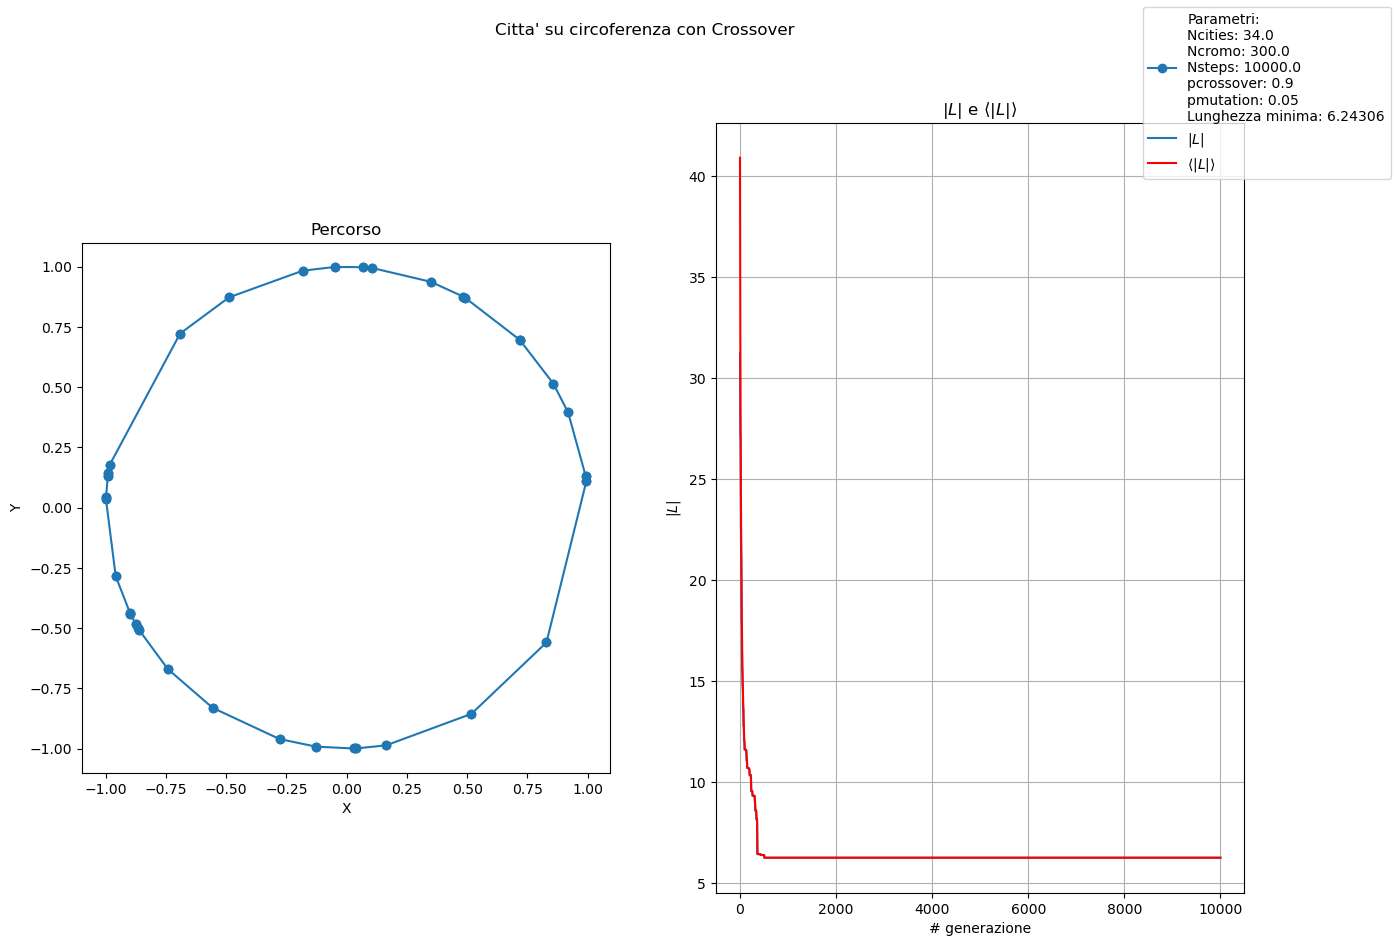

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Coordinate della mappa circolare
circlemap = np.loadtxt("./map_circle.data")
x_circle = circlemap[:, 0]
y_circle = circlemap[:, 1]

# Dati di input
input_data = np.loadtxt("./input_circle.data")
Ncities, Ncromo, Nsteps, pcrossover, pmutation = input_data

# Dati degli indici migliori
best = np.loadtxt("./best_circle.data")
indices = [int(index) for index in best]

#Dati lunghezze
lengths = np.loadtxt("./bestlength_circle.data")
bestlength = lengths[:,0]

averages = np.mean(lengths, axis=1)

# Creazione di coppie di punti collegati in base all'ordine degli indici
connected_points = [(x_circle[i], y_circle[i]) for i in indices]
connected_points.append((x_circle[indices[0]], y_circle[indices[0]]))


# Creazione del grafico
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle("Citta' su circoferenza con Crossover")
# Aggiunta della legenda con i parametri
legend_label = f'Parametri:\nNcities: {Ncities}\nNcromo: {Ncromo}\nNsteps: {Nsteps}\npcrossover: {pcrossover}\npmutation: {pmutation}\nLunghezza minima: {bestlength[-1]}'

ax[0].plot(*zip(*connected_points), '-o', label=legend_label)

ax[0].set_aspect('equal')
ax[0].scatter(x_circle, y_circle)



# Impostazione delle etichette degli assi e del titolo
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Percorso')


# Mostra il grafico
plt.grid(True)

# Plot del secondo sottoplot




# Plot del secondo sottoplot
x = np.arange(len(bestlength))

ax[1].plot(x, bestlength, label=("$|L|$"))

ax[1].set_xlabel("# generazione")
ax[1].set_ylabel("|L|")
ax[1].grid(True)

ax[1].plot(x, averages, label=r"$\langle |L| \rangle$", color="red")
ax[1].set_xlabel("# generazione")
ax[1].set_ylabel(r"$|L|$")
ax[1].set_title(r"$ |L|$ e $\langle  |L| \rangle$")
ax[1].grid(True)

# Aggiunta della legenda al grafico
fig.legend(loc='upper right')

plt.show()

## Citta' su una superficie quadrata - Solo Mutazioni

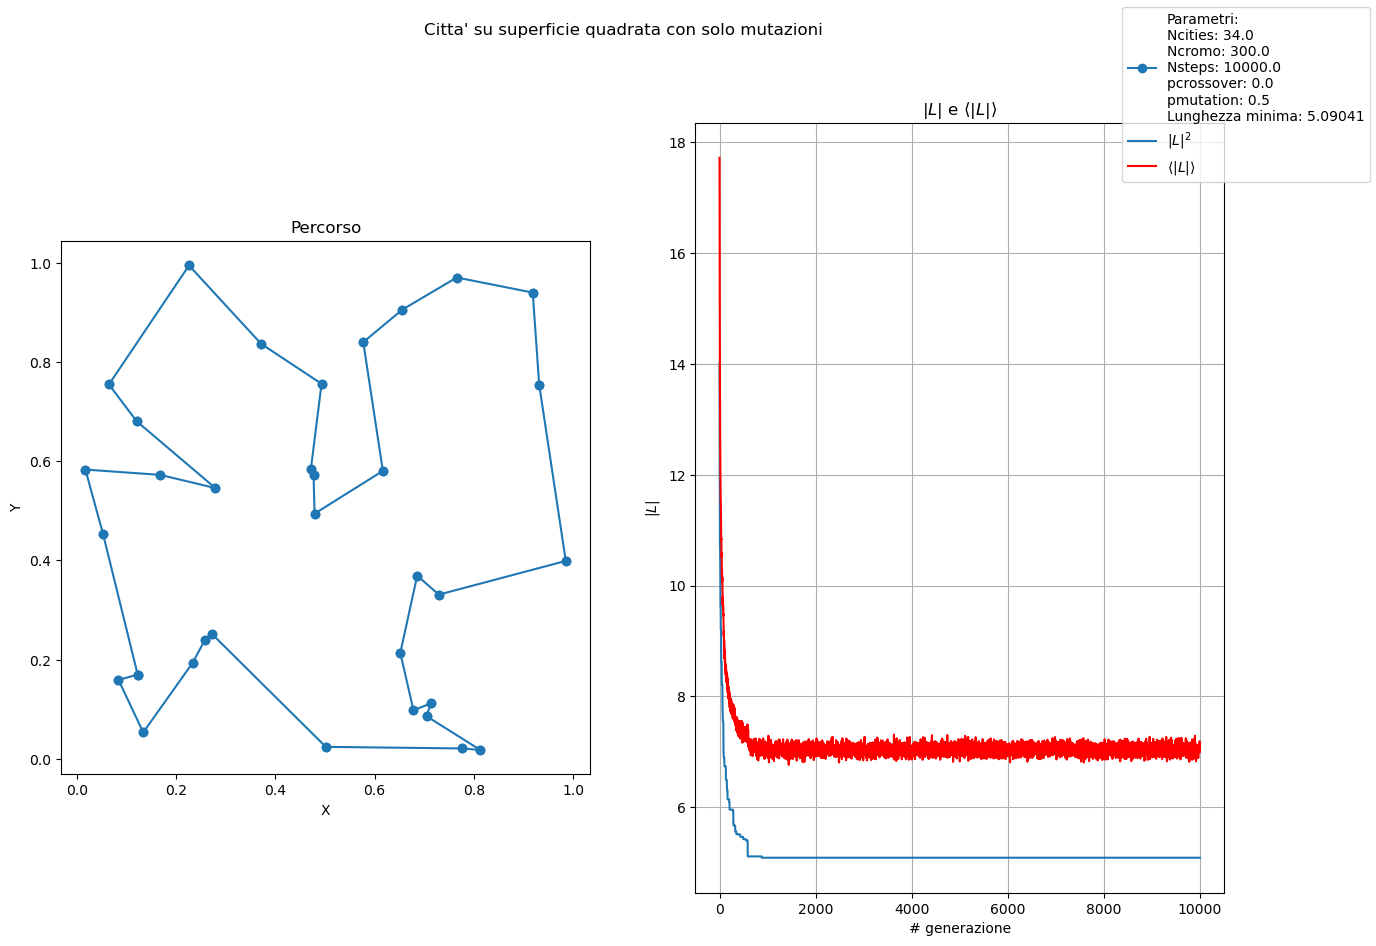

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Coordinate della mappa quadrata
circlemap = np.loadtxt("./map_square.data")
x_circle = circlemap[:, 0]
y_circle = circlemap[:, 1]

# Dati di input
input_data = np.loadtxt("./input_onlumutation_square.data")
Ncities, Ncromo, Nsteps, pcrossover, pmutation = input_data

# Dati degli indici migliori
best = np.loadtxt("./best_onlymutation_square.data")
indices = [int(index) for index in best]

#Dati lunghezze
lengths = np.loadtxt("./bestlength_square_onlymutation.data")
bestlength = lengths[:,0]

averages = np.mean(lengths, axis=1)

# Creazione di coppie di punti collegati in base all'ordine degli indici
connected_points = [(x_circle[i], y_circle[i]) for i in indices]
connected_points.append((x_circle[indices[0]], y_circle[indices[0]]))

# Creazione del grafico
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle("Citta' su superficie quadrata con solo mutazioni")
# Aggiunta della legenda con i parametri
legend_label = f'Parametri:\nNcities: {Ncities}\nNcromo: {Ncromo}\nNsteps: {Nsteps}\npcrossover: {pcrossover}\npmutation: {pmutation}\nLunghezza minima: {bestlength[-1]}'

ax[0].plot(*zip(*connected_points), '-o', label=legend_label)

ax[0].set_aspect('equal')
ax[0].scatter(x_circle, y_circle)

# Impostazione delle etichette degli assi e del titolo
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Percorso')


# Mostra il grafico
plt.grid(True)

# Plot del secondo sottoplot
x = np.arange(len(bestlength))

ax[1].plot(x, bestlength, label=("$|L|^2$"))

ax[1].set_xlabel("# generazione")
ax[1].set_ylabel("|L|^2")
ax[1].grid(True)

ax[1].plot(x, averages, label=r"$\langle |L| \rangle$", color="red")
ax[1].set_xlabel("# generazione")
ax[1].set_ylabel(r"$|L|$")
ax[1].set_title(r"$ |L|$ e $\langle  |L| \rangle$")
ax[1].grid(True)

# Aggiunta della legenda al grafico
fig.legend(loc='upper right')

plt.show()


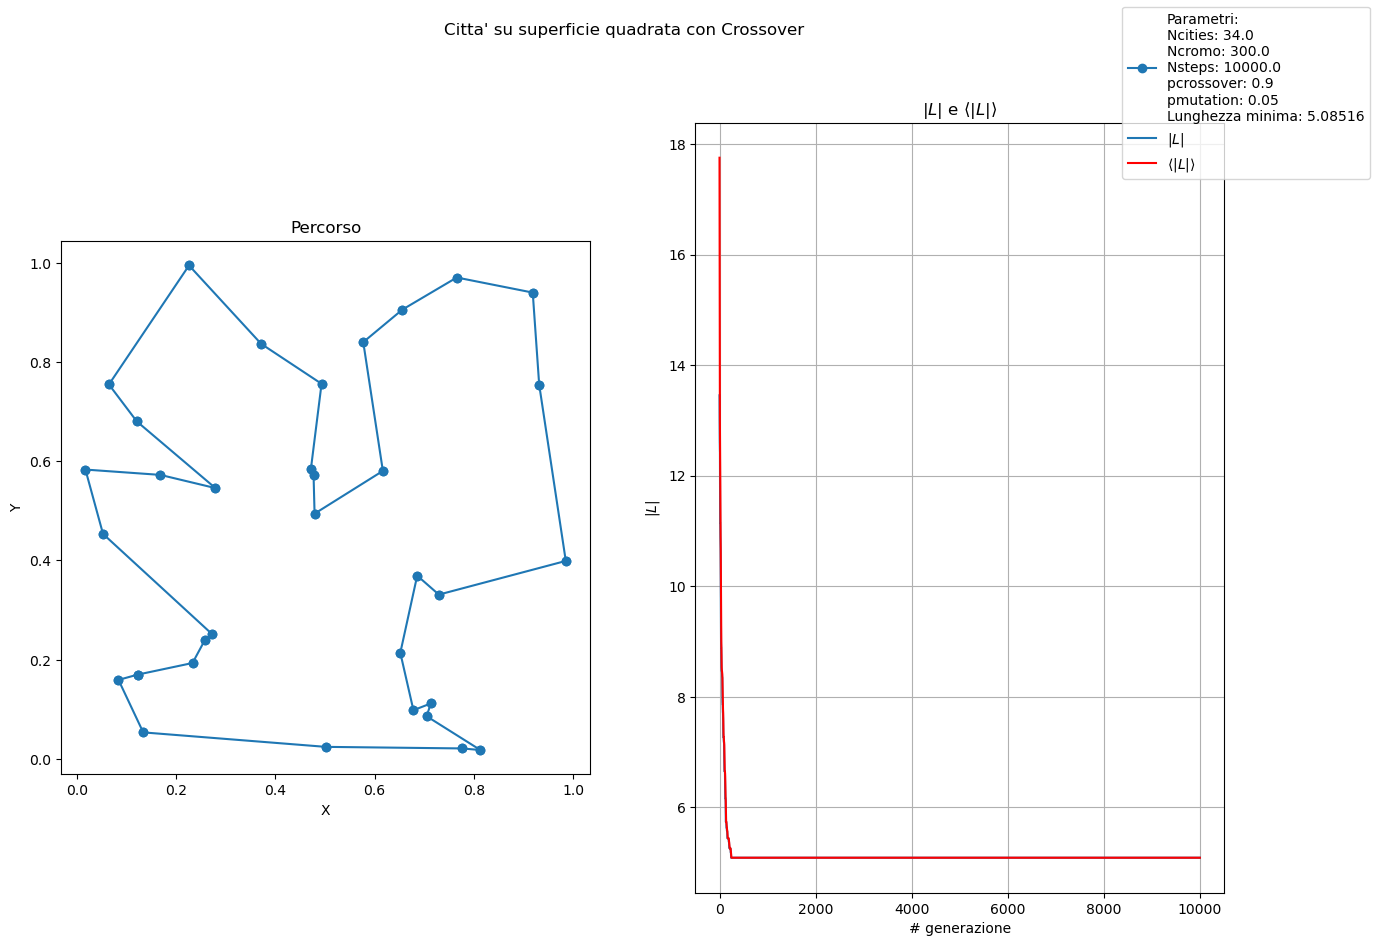

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Coordinate della mappa quadrata
circlemap = np.loadtxt("./map_square.data")
x_circle = circlemap[:, 0]
y_circle = circlemap[:, 1]

# Dati di input
input_data = np.loadtxt("./input_square.data")
Ncities, Ncromo, Nsteps, pcrossover, pmutation = input_data

# Dati degli indici migliori
best = np.loadtxt("./best_square.data")
indices = [int(index) for index in best]

#Dati lunghezze
lengths = np.loadtxt("./bestlength_square.data")
bestlength = lengths[:,0]

averages = np.mean(lengths, axis=1)

# Creazione di coppie di punti collegati in base all'ordine degli indici
connected_points = [(x_circle[i], y_circle[i]) for i in indices]
connected_points.append((x_circle[indices[0]], y_circle[indices[0]]))

# Creazione del grafico
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle("Citta' su superficie quadrata con Crossover")
# Aggiunta della legenda con i parametri
legend_label = f'Parametri:\nNcities: {Ncities}\nNcromo: {Ncromo}\nNsteps: {Nsteps}\npcrossover: {pcrossover}\npmutation: {pmutation}\nLunghezza minima: {bestlength[-1]}'

ax[0].plot(*zip(*connected_points), '-o', label=legend_label)

ax[0].set_aspect('equal')
ax[0].scatter(x_circle, y_circle)

# Impostazione delle etichette degli assi e del titolo
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Percorso')


# Mostra il grafico
plt.grid(True)

# Plot del secondo sottoplot
x = np.arange(len(bestlength))
ax[1].plot(x, bestlength, label=("$|L|$"))

ax[1].set_xlabel("# generazione")
ax[1].set_ylabel("|L|")
ax[1].grid(True)

ax[1].plot(x, averages, label=r"$\langle |L| \rangle$", color="red")
ax[1].set_xlabel("# generazione")
ax[1].set_ylabel(r"$|L|$")
ax[1].set_title(r"$ |L|$ e $\langle  |L| \rangle$")
ax[1].grid(True)

# Aggiunta della legenda al grafico
fig.legend(loc='upper right')

plt.show()


## Commenti Finali

Le stesse considerazioni valgono anche per la superficie quadrata, in cui pero' possiamo notare come utilizzando anche il Crossover si arrivi a una soluzione ancora piu' ottimale.